In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_url = "https://raw.githubusercontent.com/dthonon/pna_loup_suivi/main/data/"
# data_url = "/home/daniel-thonon/Code/pna_loup_suivi/data/"
# Lecture des départements
dept = pd.read_csv(
    data_url + "departements-region.csv",
    sep=";",
    header=0,
    names=[
        "Num_Département",
        "Département",
        "Région",
    ],
)
# Lecture des dommages aux animaux de rente
dommages = pd.read_csv(data_url + "dommages.csv", sep=";")
# Lecture des tirs létaux sur les loups
interventions = pd.read_csv(data_url + "protocole_intervention.csv", sep=";")
# Regroupement dans 1 dataframe
donnees_pna = pd.merge(dommages, interventions)

# Ajout des départements et régions
# dommages = pd.merge(dommages, dept, on="Département")
# interventions = pd.merge(interventions, dept, on="Département")
donnees_pna = pd.merge(donnees_pna, dept, on="Département")


In [3]:
# Calcul des colonnes supplémentaires
donnees_pna.fillna(0, inplace=True)
donnees_pna["AP_TOTAL"] = donnees_pna.apply(
    lambda row: row.AP_TDS + row.AP_TDR + row.AP_TP + row.AP_TPR, axis=1
)
donnees_pna["Loups_tués"] = donnees_pna.apply(
    lambda row: row.Loups_tués_légal + row.Loups_tués_illégal, axis=1
)
donnees_pna["Ratio_loups_tués_dommages"] = donnees_pna["Loups_tués"]/donnees_pna["Nb_animaux_tués"]
donnees_pna


Année              Département  Nb_dossiers  Nb_animaux_tués  Colonne1  \
0     2016  Alpes-de-Haute-Provence        477.0           1272.0       0.0   
1     2016          Alpes-Maritimes        851.0           3115.0       0.0   
2     2016                    Drôme        127.0            407.0       0.0   
3     2016             Hautes-Alpes        219.0            771.0       0.0   
4     2016                    Isère        198.0            710.0       0.0   
..     ...                      ...          ...              ...       ...   
202   2023                 Vaucluse         43.0            108.0       0.0   
203   2023                   Vienne          5.0             43.0       0.0   
204   2023                   Vosges          6.0             22.0       0.0   
205   2023                    Yonne         17.0             28.0       0.0   
206   2023                    Paris          0.0              0.0       0.0   

     Colonne2  AP_TDS  AP_TDR  AP_TP  AP_TPR  Loups_tués_légal  \
0         0.0     0.0     0.0    0.0     0.0               4.0   
1         0.0     0.0     0.0    0.0     0.0              12.0   
2         0.0     0.0     0.0    0.0     0.0               3.0   
3         0.0     0.0     0.0    0.0     0.0               1.0   
4         0.0     0.0     0.0    0.0     0.0               3.0   
..        ...     ...     ...    ...     ...               ...   
202       0.0     0.0     0.0    0.0     0.0               0.0   
203       0.0     0.0     0.0    0.0     0.0               0.0   
204       0.0     0.0     0.0    0.0     0.0               0.0   
205       0.0     2.0     0.0    0.0     0.0               0.0   
206       0.0     0.0     0.0    0.0     0.0               0.0   

     Loups_tués_illégal  Loups_tués_accident Num_Département  \
0                   0.0                  2.0              04   
1                   0.0                  0.0              06   
2                   0.0                  1.0              26   
3                   0.0                  2.0              05   
4                   0.0                  0.0              38   
..                  ...                  ...             ...   
202                 0.0                  0.0              84   
203                 0.0                  0.0              86   
204                 0.0                  0.0              88   
205                 0.0                  0.0              89   
206                 9.0                  0.0              75   

                         Région  AP_TOTAL  Loups_tués  \
0    Provence-Alpes-Côte d'Azur       0.0         4.0   
1    Provence-Alpes-Côte d'Azur       0.0        12.0   
2          Auvergne-Rhône-Alpes       0.0         3.0   
3    Provence-Alpes-Côte d'Azur       0.0         1.0   
4          Auvergne-Rhône-Alpes       0.0         3.0   
..                          ...       ...         ...   
202  Provence-Alpes-Côte d'Azur       0.0         0.0   
203          Nouvelle-Aquitaine       0.0         0.0   
204                   Grand Est       0.0         0.0   
205     Bourgogne-Franche-Comté       2.0         0.0   
206               Île-de-France       0.0         9.0   

     Ratio_loups_tués_dommages  
0                     0.003145  
1                     0.003852  
2                     0.007371  
3                     0.001297  
4                     0.004225  
..                         ...  
202                   0.000000  
203                   0.000000  
204                   0.000000  
205                   0.000000  
206                        inf  

[207 rows x 18 columns]

In [4]:
interventions_dept = pd.merge(interventions, dept, on="Département")
interventions_y = interventions_dept.groupby(["Année"])
print(interventions_y.sum(numeric_only=True))

       AP_TDS  AP_TDR  AP_TP  AP_TPR  Loups_tués_légal  Loups_tués_illégal  \
Année                                                                        
2012      0.0     0.0    0.0     0.0               3.0                 0.0   
2013      0.0     0.0    0.0     0.0               4.0                 0.0   
2014      0.0     0.0    0.0     0.0               8.0                 0.0   
2015      0.0     0.0    0.0     0.0              19.0                 0.0   
2016      0.0     0.0    0.0     0.0              33.0                 0.0   
2017      0.0     0.0    0.0     0.0              34.0                 1.0   
2018   1469.0   161.0    5.0    15.0              47.0                 4.0   
2019   1609.0   210.0   12.0     2.0              94.0                 5.0   
2020   2084.0   319.0    7.0     2.0              97.0                 8.0   
2021   2188.0   231.0    0.0     0.0             100.0                 6.0   
2022   2436.0   335.0    0.0     0.0             162.0          

In [5]:
dommages_dept = pd.merge(dommages, dept, on="Département")
dommages_y = dommages_dept.groupby(["Année"])
dommages_y.sum(numeric_only=True)

Nb_dossiers  Nb_animaux_tués  Colonne1  Colonne2
Année                                                  
2016        2756.0           9932.0       0.0       0.0
2017        3228.0          11993.0       0.0       0.0
2018        3088.0          10672.0       0.0       0.0
2019        3651.0          12094.0       0.0       0.0
2020        3670.0          11746.0       0.0       0.0
2021        3537.0          10826.0       0.0       0.0
2022        3690.0          11527.0       0.0       0.0
2023        4091.0          10877.0       0.0       0.0

In [6]:
# interventions_y = interventions.groupby(["Année"])
# interventions_y.sum(numeric_only=True)

In [7]:
donnees_pna_y = donnees_pna.groupby(["Année"])
donnees_pna_y.sum(numeric_only=True)

Nb_dossiers  Nb_animaux_tués  Colonne1  Colonne2  AP_TDS  AP_TDR  \
Année                                                                     
2016        2465.0           9040.0       0.0       0.0     0.0     0.0   
2017        2551.0           9586.0       0.0       0.0     0.0     0.0   
2018        3061.0          10589.0       0.0       0.0  1469.0   161.0   
2019        3559.0          11793.0       0.0       0.0  1609.0   210.0   
2020        3517.0          11364.0       0.0       0.0  2084.0   319.0   
2021        3409.0          10462.0       0.0       0.0  2188.0   231.0   
2022        3644.0          11435.0       0.0       0.0  2436.0   335.0   
2023        4078.0          10839.0       0.0       0.0  1380.0    65.0   

       AP_TP  AP_TPR  Loups_tués_légal  Loups_tués_illégal  \
Année                                                        
2016     0.0     0.0              33.0                 0.0   
2017     0.0     0.0              34.0                 1.0   
2018     5.0    15.0              47.0                 4.0   
2019    12.0     2.0              94.0                 5.0   
2020     7.0     2.0              97.0                 8.0   
2021     0.0     0.0             100.0                 6.0   
2022     0.0     0.0             162.0                 6.0   
2023     0.0     0.0             198.0                 9.0   

       Loups_tués_accident  AP_TOTAL  Loups_tués  Ratio_loups_tués_dommages  
Année                                                                        
2016                   5.0       0.0        33.0                   0.027318  
2017                   1.0       0.0        35.0                   0.027280  
2018                  27.0    1650.0        51.0                   0.039239  
2019                  20.0    1833.0        99.0                   0.131948  
2020                   0.0    2412.0       105.0                   0.117261  
2021                   0.0    2419.0       106.0                   0.094531  
2022                   0.0    2771.0       168.0                   0.162888  
2023                   0.0    1445.0       207.0                        inf

In [8]:
# Apply the default theme
sns.set_theme()

In [9]:
dept_max = (
    "Num_Département == '06' or Num_Département == '04' or Num_Département == '05' or Num_Département == '83'"
    + "or Num_Département == '26' or Num_Département == '38' or Num_Département == '73' or Num_Département == '74'"
)
donnees_pna_max = donnees_pna.query(dept_max)


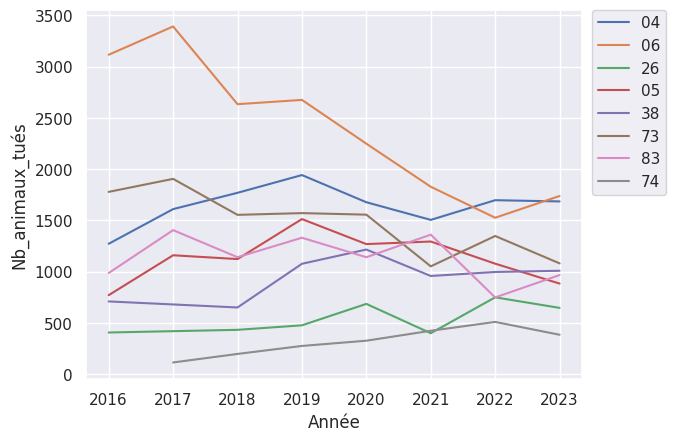

In [10]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Nb_animaux_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

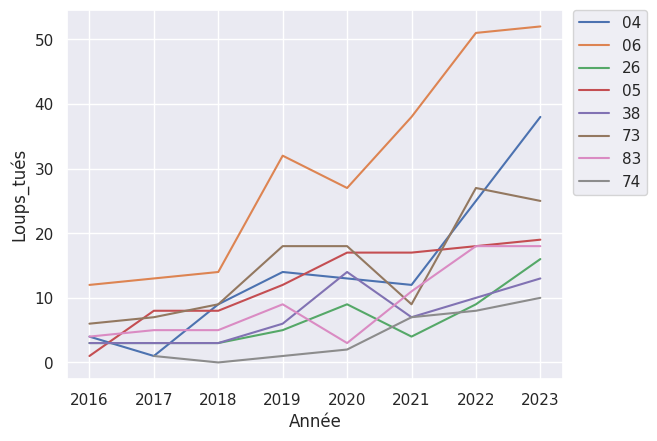

In [11]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Loups_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

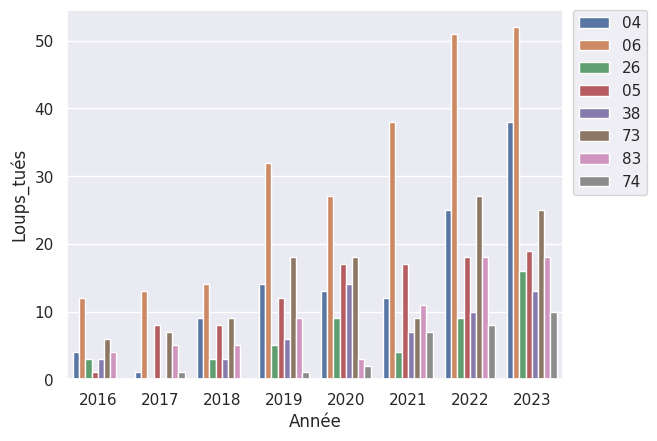

In [12]:
sns.barplot(data=donnees_pna_max, x="Année", y="Loups_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

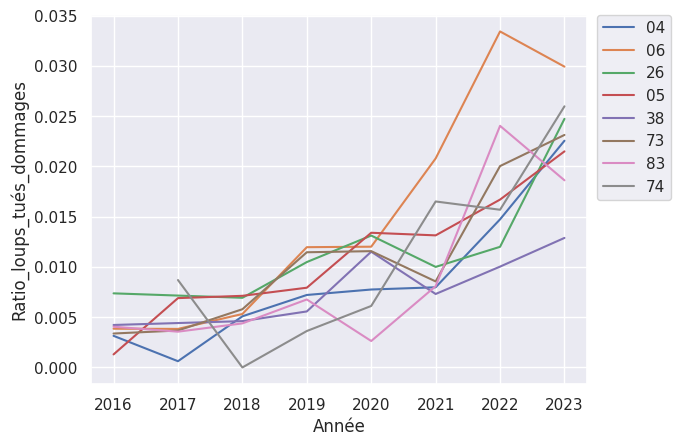

In [13]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Ratio_loups_tués_dommages", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

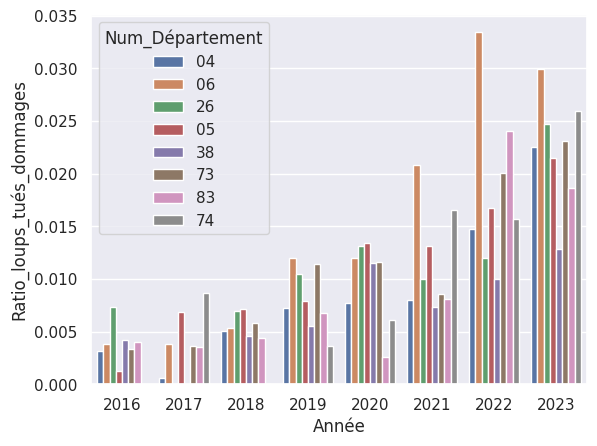

In [14]:
sns.barplot(data=donnees_pna_max, x="Année", y="Ratio_loups_tués_dommages", hue="Num_Département");

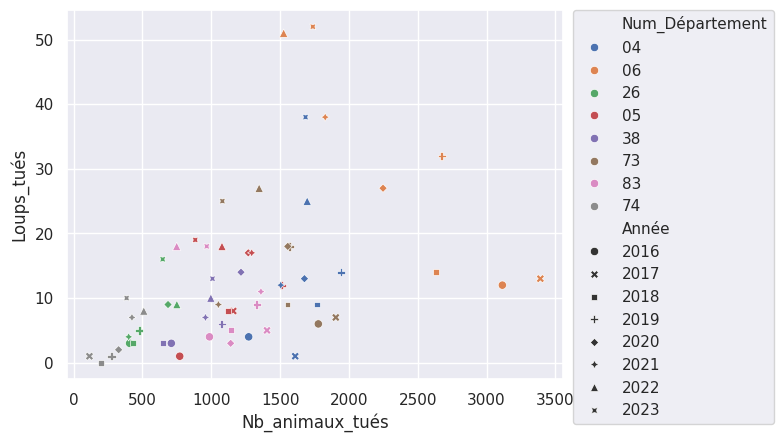

In [15]:
sns.scatterplot(
    data=donnees_pna_max,
    x="Nb_animaux_tués",
    y="Loups_tués",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

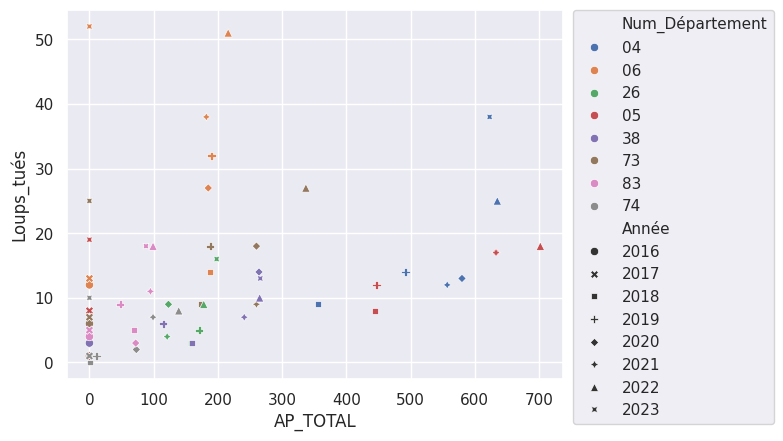

In [16]:
sns.scatterplot(
    data=donnees_pna_max,
    x="AP_TOTAL",
    y="Loups_tués",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

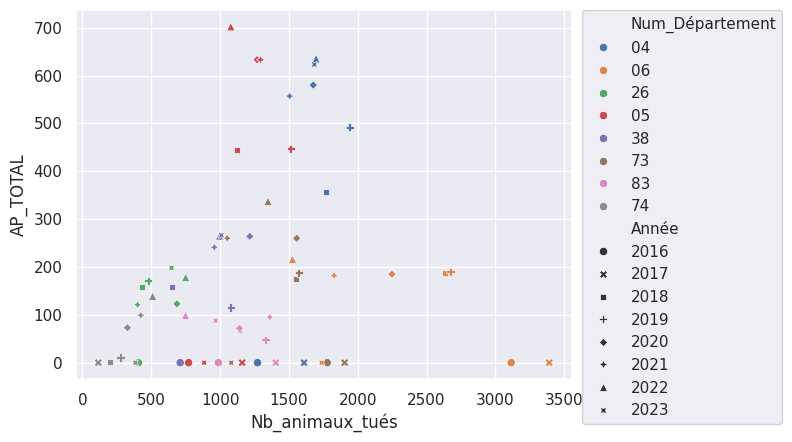

In [17]:
sns.scatterplot(
    data=donnees_pna_max,
    x="Nb_animaux_tués",
    y="AP_TOTAL",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);